In [321]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import json

import matplotlib
import matplotlib as mpl

from matplotlib import cm
import sqlite3

In [322]:
#Reading CSV File
df = pd.read_csv(r"C:\Users\ayerh\Downloads\HackUTD-2023-HomeBuyerInfo\HackUTD-2023-HomeBuyerInfo.csv")
df

,ID,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore
0,1,3103.0,317.0,374.0,250.0,268468.0,32216.16,236251.84,1127.90,778
1,2,2939.0,368.0,395.0,228.0,335467.0,30192.03,305274.97,2240.00,546
2,3,4676.0,222.0,352.0,368.0,461177.0,36894.16,424282.84,2277.64,736
3,4,8469.0,224.0,416.0,400.0,326904.0,22883.28,304020.72,1451.44,761
4,5,2406.0,497.0,385.0,444.0,472661.0,23633.05,449027.95,2987.39,615
...,...,...,...,...,...,...,...,...,...,...
9995,9996,4329.0,483.0,473.0,306.0,440365.0,123302.20,317062.80,1513.71,754
9996,9997,7037.0,465.0,408.0,338.0,312762.0,56297.16,256464.84,1537.64,656
9997,9998,9086.0,284.0,352.0,288.0,284712.0,56942.40,227769.60,1671.29,569
9998,9999,9655.0,443.0,365.0,407.0,387465.0,65869.05,321595.95,2359.76,700


In [355]:
#Asking User for Their Mode of Data Input
print("Would you like to input data or pull data from the database? (Choose 1 or 2): ")
option = int(input())
#User Inputting Data
if option == 1:
    print("Please enter your Gross Monthly Income: ")
    GrossMonthlyIncome = float(input())
    print("Please enter your Monthly Credit Card Payment: ")
    CreditCardPayment = float(input())
    print("Please enter your Monthly Car Payment: ")
    CarPayment = float(input())
    print("Please enter your Monthly StudentLoanPayments: ")
    StudentLoanPayment = float(input())
    print("Please enter your House Appraised Value: ")
    AppraisedValue = float(input())
    print("Please enter your House Down Payment: ")
    DownPayment = float(input())
    print("Please enter your Loan Amount: ")
    LoanAmount = float(input())
    print("Please enter your Monthly Mortgage Payment: ")
    MonthlyMortgagePayment = float(input())
    print("Please enter your Credit Score: ")
    CreditScore = float(input())
#User Pulling Data From Database
    else:
    print("Please enter the ID of the customer you would like to view (Choose an ID from 1 to 10000): ")
    ID = int(input()) - 1
    GrossMonthlyIncome = df.iloc[ID][1]
    CreditCardPayment = df.iloc[ID][2]
    CarPayment = df.iloc[ID][3]
    StudentLoanPayment = df.iloc[ID][4]
    AppraisedValue = df.iloc[ID][5]
    DownPayment = df.iloc[ID][6]
    LoanAmount = df.iloc[ID][7]
    MonthlyMortgagePayment = df.iloc[ID][8]
    CreditScore = df.iloc[ID][9]
#Calculating LTV, DTI, and FEDTI
LTV = LoanAmount / AppraisedValue
DTI = (CreditCardPayment + CarPayment + MonthlyMortgagePayment) / GrossMonthlyIncome
FEDTI = MonthlyMortgagePayment / GrossMonthlyIncome
#Validating whether the Credit Score, LTV, DTI, and FEDTI meet the criteria
GoodCreditScore = CreditScore >= 640
GoodLTV = LTV <= 0.8
GoodDTI = DTI <= 0.36
GoodFEDTI = FEDTI <= 0.28

#Checking what meets it criteria to see if the user is ready to buy a home
approved = 1
if CreditScore < 640:
    approved = 0
    print("Your credit score needs to be improved")
if LTV >= 0.8:
    approved = 0
    print("Your Loan-to-Value needs to be improved")
if DTI >= 0.36:
    approved = 0
    print("Your Debt-to-Income needs to be improved")
if FEDTI >= 0.28:
    approved = 0
    print("Your Front-End-Debt-to-Income needs to be improved")
#Giving User a Suggestion to Improve if They Don't Meet the Criteria
print("\nSuggestion: ")
if FEDTI > 0.28:
        print("    - Consider increasing your down payment amount or continue renting while saving more for a down payment.")
else:
    if LTV >= 0.8:
        print("    - Pay off your current debt or look for a less expensive home.")
    else:
        print("    - Your financial ratios are within acceptable ranges.")
    if DTI >= 0.36:
        print("    - Pay off your current debt or look for a less expensive home.")
    else:
        print("    - Your financial ratios are within acceptable ranges.")
#Letting the User Know Whether They Are Ready to Buy a House or Not
if(approved):
    print("\nYou have been approved! Congratualations!")
else:
    print("\nSorry, you have not been approved. Please utilize our suggestion to improve your chances of buying a house")

Would you like to input data or pull data from the database? (Choose 1 or 2): 
2
Please enter the ID of the customer you would like to view (Choose an ID from 1 to 10000): 
2
Your credit score needs to be improved
Your Loan-to-Value needs to be improved
Your Debt-to-Income needs to be improved
Your Front-End-Debt-to-Income needs to be improved

Suggestion: 
    - Consider increasing your down payment amount or continue renting while saving more for a down payment.

Sorry, you have not been approved. Please utilize our suggestion to improve your chances of buying a house


In [339]:
#Modifying Data for App Implementation
temp_df['GoodCreditScore'] = temp_df['Credit Rating'] >= 640
temp_df['GoodLTV'] = temp_df['LTV'] <= 0.8
temp_df['GoodDTI'] = temp_df['DTI'] <= 0.36
temp_df['GoodFEDTI'] = temp_df['FEDTI'] <= 0.28
columns = rows = ["Good Credit Score", "Good LTV", "Good DTI", "Good FEDTI"]
heatmap = [[(sum(temp_df['GoodCreditScore'] & temp_df['GoodCreditScore'])) / sum(temp_df['GoodCreditScore']), (sum(temp_df['GoodCreditScore'] & temp_df['GoodLTV'])) / sum(temp_df['GoodCreditScore']), (sum(temp_df['GoodCreditScore'] & temp_df['GoodDTI'])) / sum(temp_df['GoodCreditScore']), (sum(temp_df['GoodCreditScore'] & temp_df['GoodFEDTI'])) / sum(temp_df['GoodCreditScore'])],
           [(sum(temp_df['GoodLTV'] & temp_df['GoodCreditScore'])) / sum(temp_df['GoodLTV']), (sum(temp_df['GoodLTV'] & temp_df['GoodLTV'])) / sum(temp_df['GoodLTV']), (sum(temp_df['GoodLTV'] & temp_df['GoodDTI'])) / sum(temp_df['GoodLTV']), (sum(temp_df['GoodLTV'] & temp_df['GoodFEDTI'])) / sum(temp_df['GoodLTV'])], 
           [(sum(temp_df['GoodDTI'] & temp_df['GoodCreditScore'])) / sum(temp_df['GoodDTI']), (sum(temp_df['GoodDTI'] & temp_df['GoodLTV'])) / sum(temp_df['GoodDTI']), (sum(temp_df['GoodDTI'] & temp_df['GoodDTI'])) / sum(temp_df['GoodDTI']), (sum(temp_df['GoodDTI'] & temp_df['GoodFEDTI'])) / sum(temp_df['GoodDTI'])], 
           [(sum(temp_df['GoodFEDTI'] & temp_df['GoodCreditScore'])) / sum(temp_df['GoodFEDTI']), (sum(temp_df['GoodFEDTI'] & temp_df['GoodLTV'])) / sum(temp_df['GoodFEDTI']), (sum(temp_df['GoodFEDTI'] & temp_df['GoodDTI'])) / sum(temp_df['GoodFEDTI']), (sum(temp_df['GoodFEDTI'] & temp_df['GoodFEDTI'])) / sum(temp_df['GoodFEDTI'])]]
heatmap

[[1.0, 0.3968519758874749, 0.42749497655726726, 0.5380107166778298],
 [0.5948795180722891, 1.0, 0.39959839357429716, 0.5035140562248996],
 [0.7242553191489361, 0.45163120567375886, 1.0, 0.9963120567375886],
 [0.7279111916628908, 0.45446307204349795, 0.7956502038966924, 1.0]]

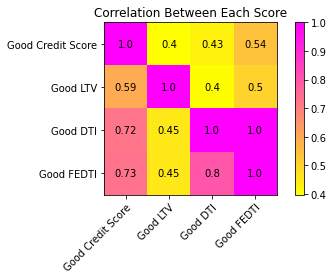

In [340]:
#Creating a Heatmap to Analyze Variable Correlation
fig, ax = plt.subplots()
im = ax.imshow(heatmap, cmap='spring_r')

cbar = ax.figure.colorbar(im, ax = ax, shrink = 1)

ax.set_xticks(np.arange(len(columns)), labels=columns)
ax.set_yticks(np.arange(len(rows)), labels=rows)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(rows)):
    for j in range(len(columns)):
        text = ax.text(j, i, (round(heatmap[i][j] * 100) / 100), ha="center", va="center", color="k",)
        
ax.set_title("Correlation Between Each Score")
fig.tight_layout()
plt.show()

In [341]:
#Modifying Data for App Implementation
temp_df2 = pd.DataFrame()
temp_df2['ID'] = temp_df['ID']
temp_df2['GoodCreditScore'] = temp_df['GoodCreditScore']
temp_df2['GoodLTV'] = temp_df['GoodLTV']
temp_df2['GoodDTI'] = temp_df['GoodDTI']
temp_df2['GoodFEDTI'] = temp_df['GoodFEDTI']
temp_df2

,ID,GoodCreditScore,GoodLTV,GoodDTI,GoodFEDTI
0,1,True,False,False,False
1,2,False,False,False,False
2,3,True,False,False,False
3,4,True,False,True,True
4,5,False,False,False,False
...,...,...,...,...,...
9995,9996,True,True,False,False
9996,9997,True,False,True,True
9997,9998,False,True,True,True
9998,9999,True,False,True,True


In [342]:
#Exporting Manipulated Data
temp_df2.to_csv('data.csv', index = False)